In [174]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score

In [56]:
vehicle_df = pd.read_csv("vehicle.csv")

In [57]:
vehicle_df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [58]:
vehicle_df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [59]:
vehicle_df.shape

(846, 19)

In [60]:
vehicle_df.describe()

compactness  circularity  distance_circularity  radius_ratio  \
count   846.000000   841.000000            842.000000    840.000000   
mean     93.678487    44.828775             82.110451    168.888095   
std       8.234474     6.152172             15.778292     33.520198   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%      93.000000    44.000000             80.000000    167.000000   
75%     100.000000    49.000000             98.000000    195.000000   
max     119.000000    59.000000            112.000000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            844.000000               846.000000     845.000000   
mean              61.678910                 8.567376     168.901775   
std                7.891463                 4.601217      33.214848   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     147.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count     845.000000              843.000000                 846.000000   
mean       40.933728               20.582444                 147.998818   
std         7.816186                2.592933                  14.515652   
min        26.000000               17.000000                 118.000000   
25%        33.000000               19.000000                 137.000000   
50%        43.000000               20.000000                 146.000000   
75%        46.000000               23.000000                 159.000000   
max        61.000000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       843.000000         844.000000                 844.000000   
mean        188.631079         439.494076                 174.709716   
std          31.411004         176.666903                  32.584808   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.000000                 149.000000   
50%         179.000000         363.500000                 173.500000   
75%         217.000000         587.000000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   842.000000      840.000000        845.000000   
mean                     72.447743        6.364286         12.602367   
std                       7.486190        4.920649          8.936081   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          5.000000   
50%                      71.500000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio  
count        845.000000     846.000000  
mean         188.919527     195.632388  
std            6.155809       7.438797  
min          176.000000     181.000000  
25%          184.000000     190.250000  
50%          188.000000     197.000000  
75%          193.000000     201.000000  
max          206.000000     211.000000

In [71]:
# Replace the categorical variables in the class column with coding
vehicle_df['class'] = vehicle_df['class'].replace({'car': 0, 'van': 1, 'bus': 2})

In [73]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [74]:
# From the above results it can be seen that some columns have missing values

In [75]:
# Check for missing value columns

def num_missing(x):
  return sum(x.isnull())

#Applying per column:
print("Missing values per column:")
print(vehicle_df.apply(num_missing, axis=0))

Missing values per column:
compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64


In [78]:
# Replacing missing values with the mean values of the same class

vehicle_df[vehicle_df["class"] == 0] = vehicle_df[vehicle_df["class"] == 0].apply(lambda x: x.fillna(x.mean()),axis=0)
vehicle_df[vehicle_df["class"] == 1] = vehicle_df[vehicle_df["class"] == 1].apply(lambda x: x.fillna(x.mean()),axis=0)
vehicle_df[vehicle_df["class"] == 2] = vehicle_df[vehicle_df["class"] == 2].apply(lambda x: x.fillna(x.mean()),axis=0)

In [79]:
# Check for missing value columns after replacement

def num_missing(x):
  return sum(x.isnull())

#Applying per column:
print("Missing values per column:")
print(vehicle_df.apply(num_missing, axis=0))


Missing values per column:
compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64


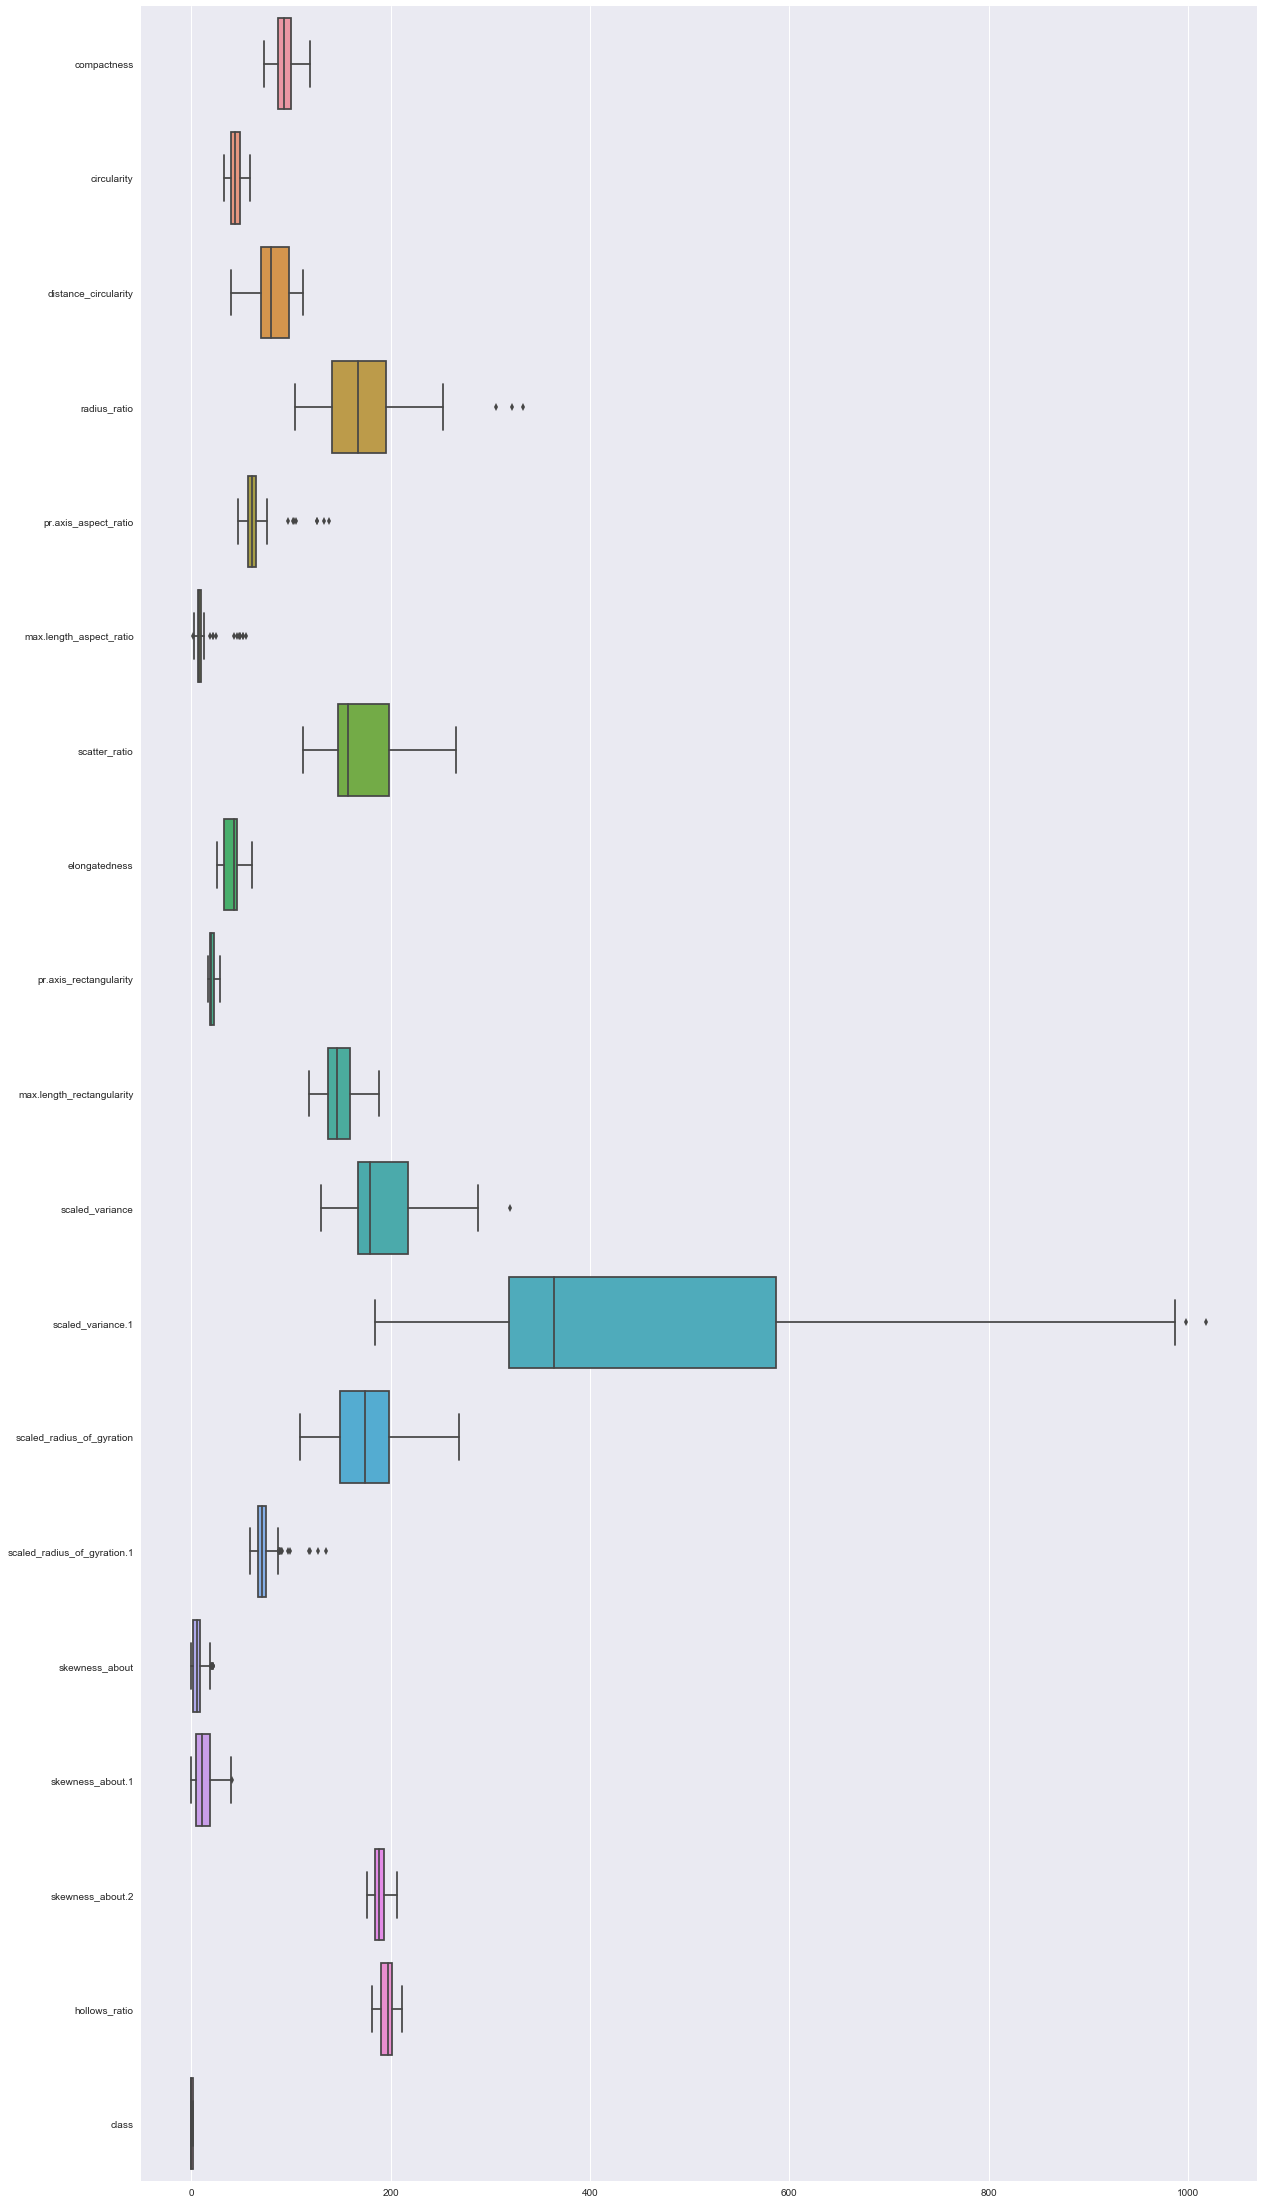

In [130]:
sns.set(rc={'figure.figsize':(20,40)})
sns.boxplot(data=vehicle_df,orient="h")

In [131]:
# From the above boxplots below columns appear to have outliers
# radius_ratio
# pr.axis_aspect_ratio
# max.length_aspect_ratio 
# scaled variance
# scaled variance_1
# scaled_radius_of_gyration.1 

In [132]:
# Calculating the no.of outliers

# Calculating Q1 for each column

Q1 = vehicle_df.quantile(0.25)

# Calculating Q3 for each column

Q3 = vehicle_df.quantile(0.75)

# calculating interquartileregion (IQR) for each column

IQR = Q3-Q1

# Identifying & Printing outliers

vehicle_df_ol = vehicle_df[(vehicle_df < (Q1-1.5*IQR)) | (vehicle_df > (Q3+1.5*IQR))].dropna(how='all')

vehicle_df_ol.count() # Prints the no. of outlier values


compactness                     0
circularity                     0
distance_circularity            0
radius_ratio                    3
pr.axis_aspect_ratio            8
max.length_aspect_ratio        13
scatter_ratio                   0
elongatedness                   0
pr.axis_rectangularity          0
max.length_rectangularity       0
scaled_variance                 1
scaled_variance.1               2
scaled_radius_of_gyration       0
scaled_radius_of_gyration.1    15
skewness_about                 12
skewness_about.1                1
skewness_about.2                0
hollows_ratio                   0
class                           0
dtype: int64

In [139]:
#No. of rows with outliers
vehicle_df_ol.shape

(33, 19)

In [140]:
# Removing the outliers from the dataset

vehicle_df = vehicle_df[~((vehicle_df < (Q1 - 1.5 * IQR)) |(vehicle_df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [141]:
# Shape of the dataset after removing the outliers

vehicle_df.shape

(813, 19)

In [142]:
vehicle_df.corr()

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.680361              0.786385   
circularity                     0.680361     1.000000              0.787160   
distance_circularity            0.786385     0.787160              1.000000   
radius_ratio                    0.745938     0.641378              0.808827   
pr.axis_aspect_ratio            0.201032     0.205573              0.245316   
max.length_aspect_ratio         0.497660     0.563827              0.668773   
scatter_ratio                   0.809874     0.843655              0.903637   
elongatedness                  -0.788182    -0.816118             -0.908632   
pr.axis_rectangularity          0.811283     0.842694              0.894643   
max.length_rectangularity       0.674166     0.962252              0.768180   
scaled_variance                 0.791855     0.802224              0.883838   
scaled_variance.1               0.815902     0.836753              0.890179   
scaled_radius_of_gyration       0.577082     0.926560              0.701354   
scaled_radius_of_gyration.1    -0.254766     0.068709             -0.238992   
skewness_about                  0.201028     0.140649              0.097997   
skewness_about.1                0.162129    -0.014776              0.264822   
skewness_about.2                0.295395    -0.118526              0.129244   
hollows_ratio                   0.364160     0.037972              0.322445   
class                          -0.256532    -0.117437             -0.369901   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.745938              0.201032   
circularity                      0.641378              0.205573   
distance_circularity             0.808827              0.245316   
radius_ratio                     1.000000              0.666479   
pr.axis_aspect_ratio             0.666479              1.000000   
max.length_aspect_ratio          0.460130              0.137699   
scatter_ratio                    0.788758              0.199714   
elongatedness                   -0.844508             -0.302461   
pr.axis_rectangularity           0.763713              0.168556   
max.length_rectangularity        0.577100              0.146207   
scaled_variance                  0.793518              0.215352   
scaled_variance.1                0.779221              0.187369   
scaled_radius_of_gyration        0.549871              0.153138   
scaled_radius_of_gyration.1     -0.404933             -0.325222   
skewness_about                   0.042374             -0.051371   
skewness_about.1                 0.188729             -0.028979   
skewness_about.2                 0.419012              0.406678   
hollows_ratio                    0.505123              0.419926   
class                           -0.268405              0.122655   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.497660       0.809874   
circularity                                 0.563827       0.843655   
distance_circularity                        0.668773       0.903637   
radius_ratio                                0.460130       0.788758   
pr.axis_aspect_ratio                        0.137699       0.199714   
max.length_aspect_ratio                     1.000000       0.496529   
scatter_ratio                               0.496529       1.000000   
elongatedness                              -0.501932      -0.970137   
pr.axis_rectangularity                      0.497408       0.989161   
max.length_rectangularity                   0.647844       0.805385   
scaled_variance                             0.411062       0.976436   
scaled_variance.1                           0.460182       0.993848   
scaled_radius_of_gyration                   0.403814       0.793228   
scaled_radius_of_gyration.1                -0.332102       0.001921   
skewness_about                            

In [143]:
## Among the independent variables below pair of colummns have a correlation of > 0.9 

## which means each explain > 90% variance of the other. Hence either of the pair can be used for the analysis

# max.length_rectangularity        circularity
# scaled radius of gyration        circularity
# scatter ratio                    distance_circularity
# elongatedness                    distance_circularity
# elongatedness                    scatter_ratio
# pr.axis_rectangularity           scatter_ratio
# scaled_variance                  scatter_ratio
# scaled_variance.1                scatter_ratio
# pr.axis_rectangularity           elongatedness
# scaled_variance                  elongatedness
# scaled_variance.1                elongatedness
# pr.axis_rectangularity           scaled_variance
# pr.axis_rectangularity           scaled_variance.1
# scaled_variance                  scaled variance.1
# scaled_radius_of_gyration.1      hollows_ratio

In [145]:
# When correlation of dependent variable with the independent variables is checked, 
# scaled_radius_of_gyration and skewness_about.2 columns have very less correlation. 
# Hence these columns can be ignored for the classification model
# Correlation of target variable is not high with any of the independent variables, highest being -0.45 (max.length_aspect_ratio)

C:\Users\gopin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\gopin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


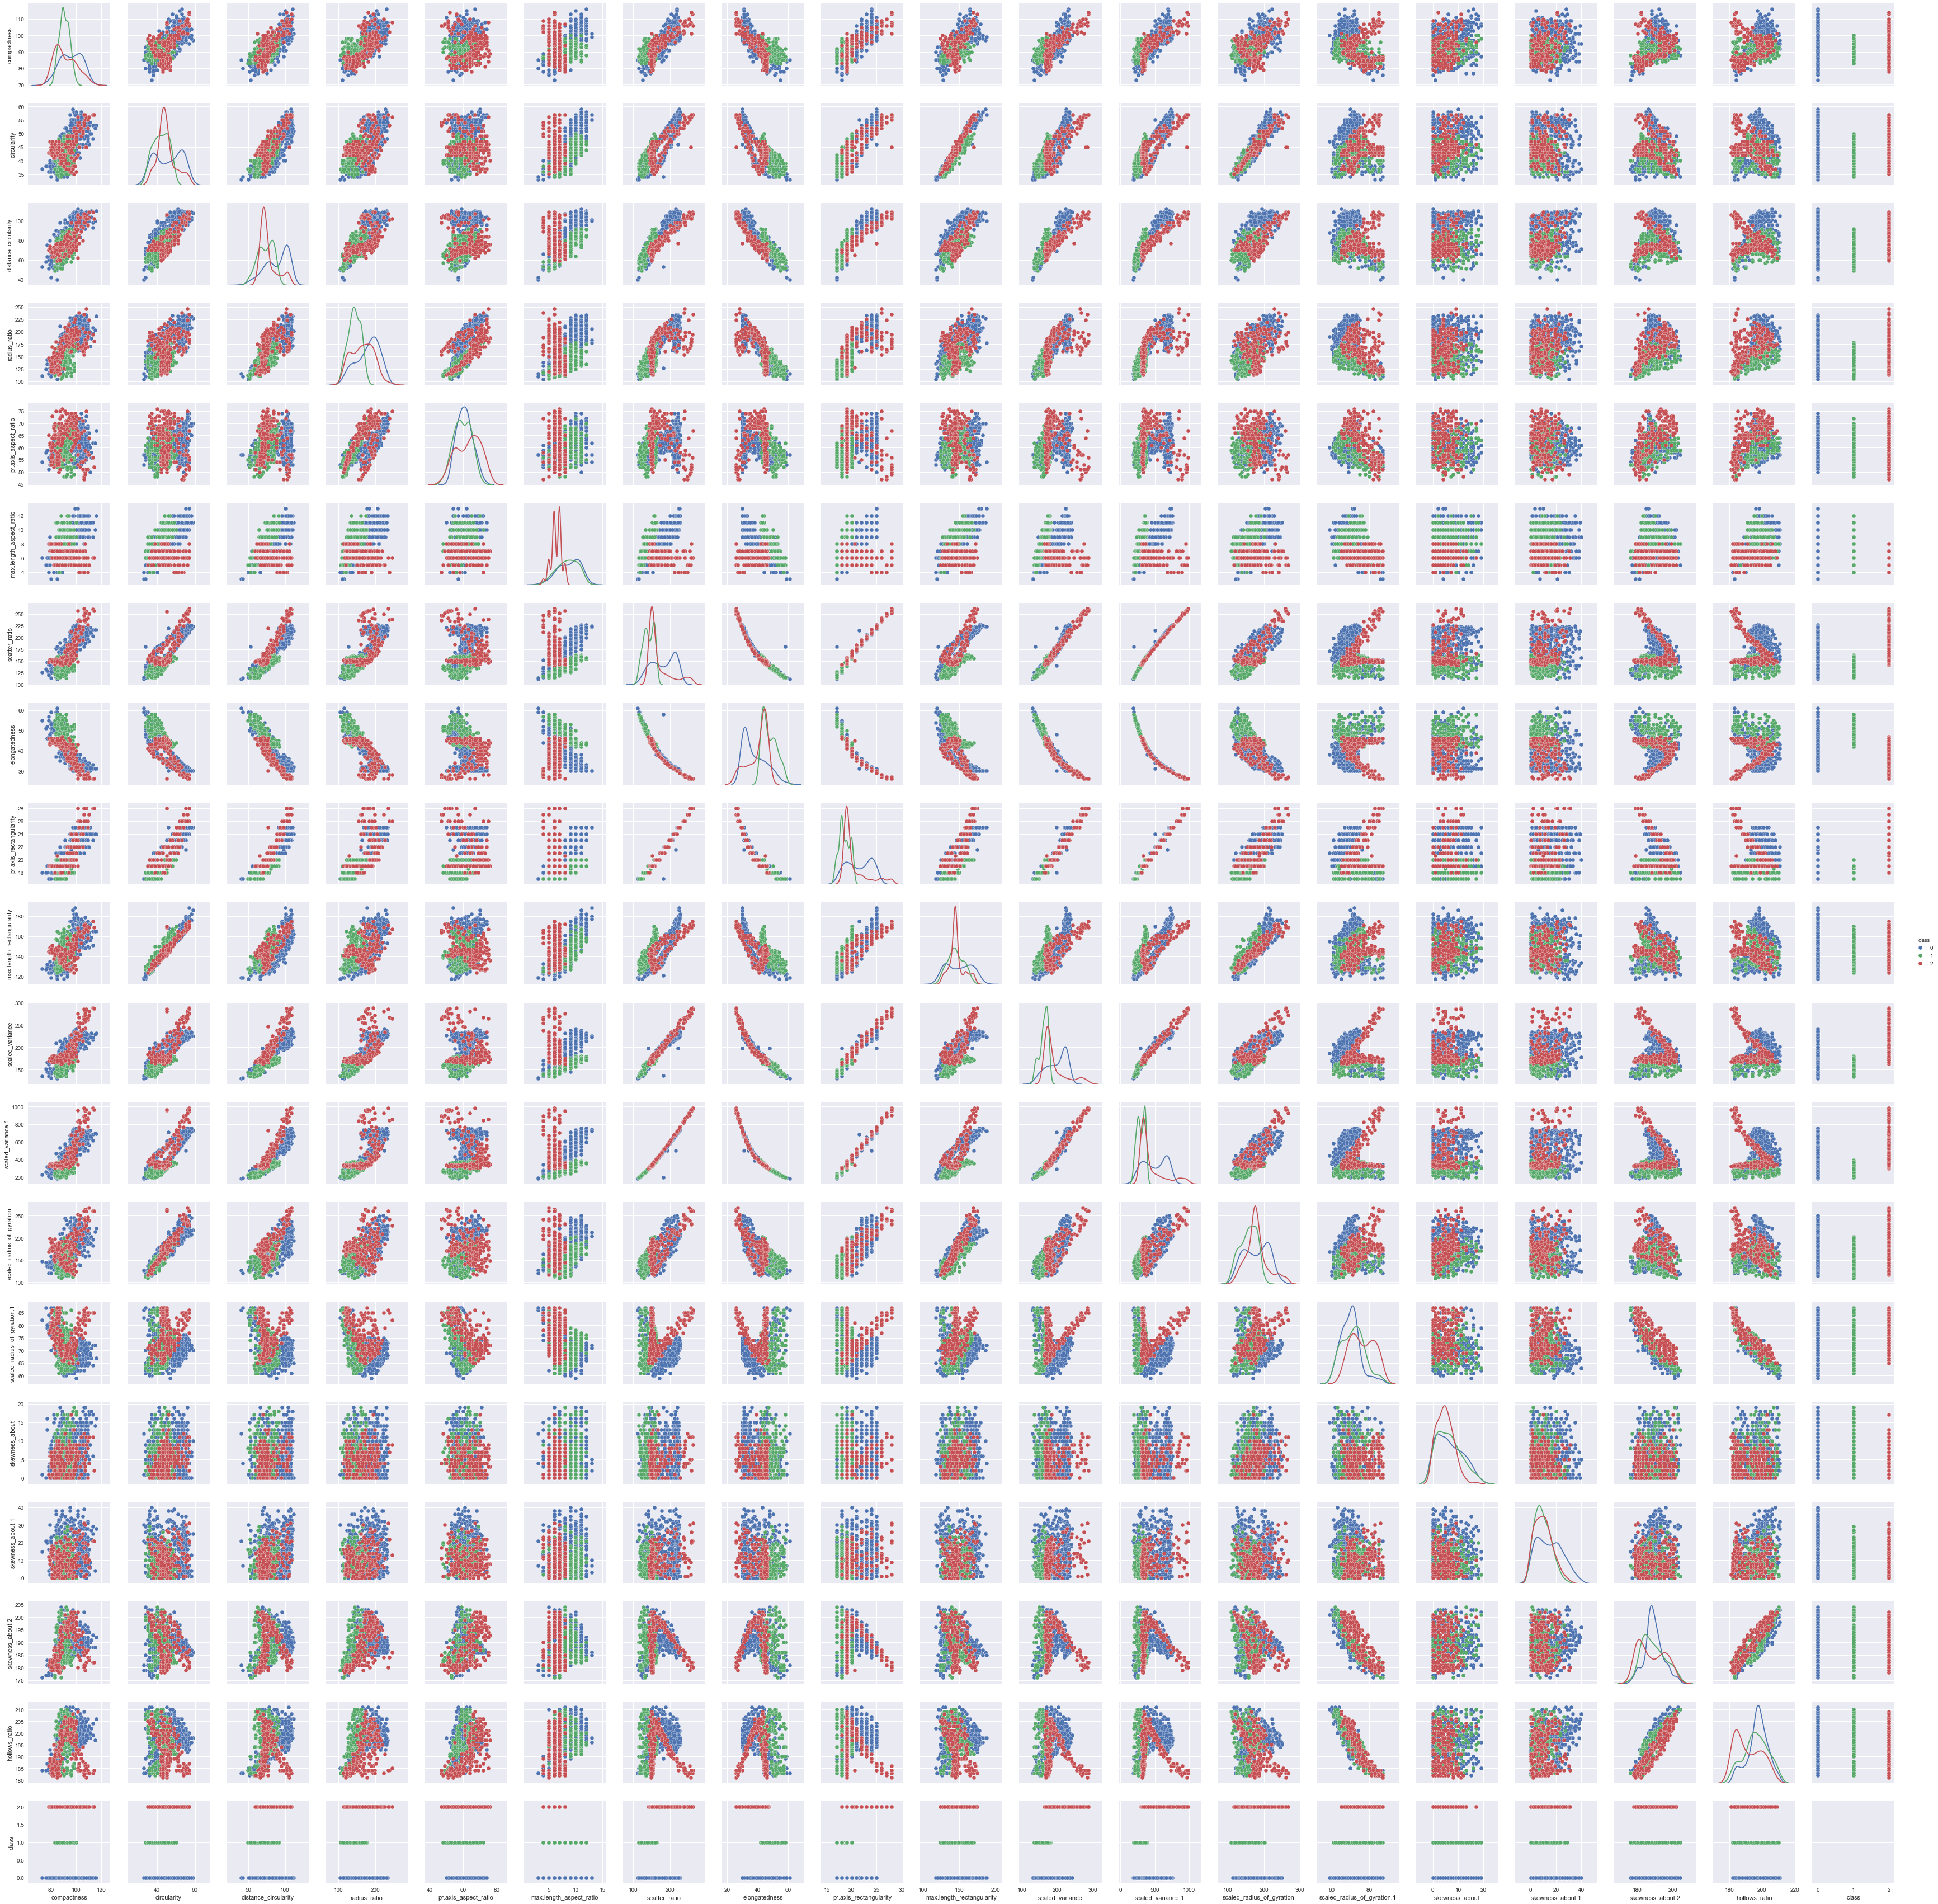

In [147]:
#Let us check for pair plots
sns.pairplot(vehicle_df,diag_kind='kde',hue='class')

In [148]:
## Using PCA to reduce the dimensions

X = vehicle_df[vehicle_df.columns[:-1]]
y = vehicle_df["class"]

In [152]:
# Standardising the independent variable data

sc = StandardScaler()
X_std =  sc.fit_transform(X)

C:\Users\gopin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\gopin\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [153]:
# PCA
# Step 1 - Create covariance matrix
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n', cov_matrix)

Covariance Matrix 
 [[ 1.00123153e+00  6.81198411e-01  7.87353319e-01  7.46856275e-01
   2.01280030e-01  4.98273207e-01  8.10871063e-01 -7.89153097e-01
   8.12281707e-01  6.74996601e-01  7.92830660e-01  8.16906479e-01
   5.77792845e-01 -2.55079686e-01  2.01275252e-01  1.62328849e-01
   2.95758370e-01  3.64608943e-01]
 [ 6.81198411e-01  1.00123153e+00  7.88129248e-01  6.42167947e-01
   2.05825754e-01  5.64521415e-01  8.44694146e-01 -8.17123183e-01
   8.43731484e-01  9.63437335e-01  8.03211798e-01  8.37783520e-01
   9.27701411e-01  6.87940704e-02  1.40821982e-01 -1.47945720e-02
  -1.18671926e-01  3.80190490e-02]
 [ 7.87353319e-01  7.88129248e-01  1.00123153e+00  8.09822838e-01
   2.45618040e-01  6.69596933e-01  9.04750323e-01 -9.09751017e-01
   8.95744398e-01  7.69126486e-01  8.84926208e-01  8.91275489e-01
   7.02217483e-01 -2.39286297e-01  9.81177360e-02  2.65148126e-01
   1.29402777e-01  3.22842589e-01]
 [ 7.46856275e-01  6.42167947e-01  8.09822838e-01  1.00123153e+00
   6.67299484e-01

In [155]:
# Step 2- Get eigen values and eigen vector
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n', eigenvectors)
print('\n Eigen Values \n', eigenvalues)

Eigen Vectors 
 [[-0.27222341 -0.08995829  0.0215864   0.13075523 -0.15102288  0.25930901
  -0.1852685  -0.77187096 -0.36307421 -0.12641857  0.02990875  0.00162289
  -0.00333031 -0.11957656  0.13061622  0.002121   -0.0018829  -0.00087362]
 [-0.28555061  0.13396016  0.21204058 -0.01917158  0.13689549 -0.06786032
   0.38810065 -0.06313844 -0.04537819  0.23899684  0.06686433  0.16589576
   0.02377346 -0.30281769 -0.22570838 -0.10684835  0.45244259  0.4761649 ]
 [-0.30134587 -0.04455074 -0.0721761   0.106447    0.08216873 -0.02035689
  -0.17605392  0.29969863 -0.26799509 -0.09595489  0.78146768 -0.21378944
   0.00948401  0.06948035 -0.0460729   0.02436102  0.11376442 -0.06843133]
 [-0.27263285 -0.20453628 -0.03787605 -0.25220547 -0.12054055 -0.13959123
  -0.15534864  0.05448325 -0.16852804  0.10029888 -0.13361388  0.26864446
  -0.02110083 -0.13726083 -0.68637544  0.01256513 -0.1896995  -0.32039318]
 [-0.09853335 -0.25892885  0.12004329 -0.60424687 -0.0857131  -0.58682767
  -0.1021687  -0.1

In [156]:
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))] # Pair of eigen values and vectors

In [157]:
eig_pairs.sort() # Sorting as per eigen values
eig_pairs.reverse() # Making it Descending order

# Extracting the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

print('Eigen values in descending order: \n%s' %eigvalues_sorted) # Eigen Values in descending order

Eigen values in descending order: 
[9.796507685306228, 3.381301277445416, 1.2087065190195418, 1.137080958173851, 0.8967290538509792, 0.657577580710794, 0.32205776834175576, 0.22707062630231917, 0.11189594051053936, 0.07598920777046667, 0.061902003252498, 0.04273799099101786, 0.02914615831925296, 0.025958825202365594, 0.019453081191142772, 0.016067691440154627, 0.008555048780835395, 0.003430071075565238]


In [159]:
# Variance explained by each eigen vector

tot_var = sum(eigenvalues)

var_exp = [(i / tot_var) for i in sorted(eigenvalues, reverse=True)] # Variance explained by each vector 

cum_var_exp = np.cumsum(var_exp)  # Cumulative variance array

In [160]:
var_exp

[0.5435809922419476,
 0.18761901307131876,
 0.0670677663963283,
 0.06309346303383677,
 0.0497570036713814,
 0.03648715289990193,
 0.017870090740296964,
 0.012599518146609487,
 0.006208794840409867,
 0.004216430006124023,
 0.0034347701681719553,
 0.0023714123742453546,
 0.0016172393436677198,
 0.001440383084892775,
 0.001079397425666799,
 0.000891551554558259,
 0.0004746958869781566,
 0.00019032511366399988]

In [161]:
cum_var_exp

array([0.54358099, 0.73120001, 0.79826777, 0.86136123, 0.91111824,
       0.94760539, 0.96547548, 0.978075  , 0.9842838 , 0.98850023,
       0.991935  , 0.99430641, 0.99592365, 0.99736403, 0.99844343,
       0.99933498, 0.99980967, 1.        ])

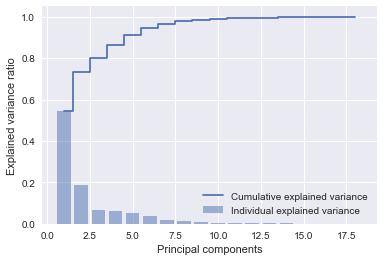

In [163]:
plt.bar(range(1,19), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1,19),cum_var_exp, where= 'mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [164]:
# As the variance of greater than 95% is being explaind by first 7 components, considering 7 components for the transformation

In [165]:
from sklearn.decomposition import PCA

In [166]:
X_centered = X_std - X_std.mean(axis=0)

In [167]:
pca = PCA(n_components=7)
pca.fit(X_centered)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [168]:
X_pca = pca.transform(X_centered)

In [169]:
X_pca = pd.DataFrame(X_pca)

In [170]:
X_pca.head()

0         1         2         3         4         5         6
0  0.589082 -0.653943 -0.573727  0.655077 -0.846852 -1.838199 -0.159190
1 -1.526679 -0.327761 -0.239409 -1.299089 -0.285013 -0.093868  0.207385
2  3.967140  0.236720 -1.227211 -0.194440  0.922499 -0.647347  0.827086
3 -1.552054 -3.036890 -0.463507 -0.397984 -0.628397  0.379951  0.128391
4  5.512810  4.667952  1.256314 -0.012326  1.657375  2.506229  0.255217

In [171]:
X_pca.shape

(813, 7)

In [176]:
# Splitting the data into training and test data sets

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.30, random_state=1)

In [178]:
## Grid search
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
classifier = SVC(random_state = 0)

In [179]:
parameters = [{'C': [0.01,0.05,0.5,1], 'kernel': ['linear','rbf']}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

C:\Users\gopin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\gopin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [180]:
best_accuracy = grid_search.best_score_
best_accuracy

0.9244288224956063

In [181]:
best_parameters = grid_search.best_params_
best_parameters

{'C': 1, 'kernel': 'rbf'}

In [182]:
grid_search.cv_results_['params']

[{'C': 0.01, 'kernel': 'linear'},
 {'C': 0.01, 'kernel': 'rbf'},
 {'C': 0.05, 'kernel': 'linear'},
 {'C': 0.05, 'kernel': 'rbf'},
 {'C': 0.5, 'kernel': 'linear'},
 {'C': 0.5, 'kernel': 'rbf'},
 {'C': 1, 'kernel': 'linear'},
 {'C': 1, 'kernel': 'rbf'}]

In [184]:
grid_search.cv_results_['mean_test_score']

array([0.80843585, 0.51845343, 0.84534271, 0.59929701, 0.85588752,
       0.91564148, 0.85237258, 0.92442882])

In [185]:
# Best parameters are 'C': 1, 'kernel': 'rbf' and accuracy for these parameters is 0.9244288224956063